<a href="https://colab.research.google.com/github/philxhuang/udacity-projects/blob/master/3_trainNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Train NN with Back-Propagation and Gradient Descent

In [0]:
import torch
from torch import nn
import torch.nn.functional as F
from torchvision import datasets, transforms

import helper
import numpy as np
import matplotlib.pyplot as plt

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,)),
                              ])
# Download and load the training data
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

0it [00:00, ?it/s]

9920512it [00:01, 8491412.12it/s]                            


Extracting /root/.pytorch/MNIST_data/MNIST/raw/train-images-idx3-ubyte.gz


  0%|          | 0/28881 [00:00<?, ?it/s]

32768it [00:00, 130483.41it/s]           
  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting /root/.pytorch/MNIST_data/MNIST/raw/train-labels-idx1-ubyte.gz


1654784it [00:00, 2141912.16it/s]                            
0it [00:00, ?it/s]

Extracting /root/.pytorch/MNIST_data/MNIST/raw/t10k-images-idx3-ubyte.gz


8192it [00:00, 48702.26it/s]            


Extracting /root/.pytorch/MNIST_data/MNIST/raw/t10k-labels-idx1-ubyte.gz
Processing...
Done!


In [0]:
def view_classify(img, ps, version="MNIST"):
   ''' Function for viewing an image and it's predicted classes.
   '''
   ps = ps.data.numpy().squeeze()

   fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
   ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
   ax1.axis('off')
   ax2.barh(np.arange(10), ps)
   ax2.set_aspect(0.1)
   ax2.set_yticks(np.arange(10))
   if version == "MNIST":
       ax2.set_yticklabels(np.arange(10))
   elif version == "Fashion":
       ax2.set_yticklabels(['T-shirt/top',
                           'Trouser',
                           'Pullover',
                           'Dress',
                           'Coat',
                           'Sandal',
                           'Shirt',
                           'Sneaker',
                           'Bag',
                           'Ankle Boot'], size='small');
   ax2.set_title('Class Probability')
   ax2.set_xlim(0, 1.1)

   plt.tight_layout()

In [0]:
# Build a feed-forward network
model = nn.Sequential(nn.Linear(784, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10),
                      nn.LogSoftmax(dim=1)
                     )

# Get our data
images, labels = next(iter(trainloader))
# Flatten images
images = images.view(images.shape[0], -1)
print(images.shape)

# Forward pass, get our logits
logits = model(images)

torch.Size([64, 784])


Now let's use Cross Entropy to calculate loss.

In [0]:
# Define the loss
criterion = nn.CrossEntropyLoss() # or nn.NLLLoss()

# Calculate the loss with the logits and the labels
loss = criterion(logits, labels)

print(loss)

tensor(2.3192, grad_fn=<NllLossBackward>)


In [0]:
print('Before backward pass: \n', model[0].weight.grad)

# somehow loss already knows the nn you are using so you can magically call .backward()
loss.backward()

print('After backward pass: \n', model[0].weight.grad)

Before backward pass: 
 None
After backward pass: 
 tensor([[ 0.0033,  0.0033,  0.0033,  ...,  0.0033,  0.0033,  0.0033],
        [-0.0015, -0.0015, -0.0015,  ..., -0.0015, -0.0015, -0.0015],
        [-0.0012, -0.0012, -0.0012,  ..., -0.0012, -0.0012, -0.0012],
        ...,
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [-0.0032, -0.0032, -0.0032,  ..., -0.0032, -0.0032, -0.0032],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000]])


## Optimizer for B-P

In [0]:
from torch import optim

# Optimizers require the parameters to optimize and a learning rate
optimizer = optim.SGD(model.parameters(), lr=0.003)
print(optimizer)

SGD (
Parameter Group 0
    dampening: 0
    lr: 0.003
    momentum: 0
    nesterov: False
    weight_decay: 0
)


In [0]:
print('Initial weights - ', model[0].weight)

images, labels = next(iter(trainloader))
images.resize_(64, 784)

# Clear the gradients, do this because gradients are accumulated
optimizer.zero_grad()

# Forward pass, then backward pass, then update weights
output = model(images)
loss = criterion(output, labels)
loss.backward()
print('Gradient -', model[0].weight.grad)

Initial weights -  Parameter containing:
tensor([[ 1.9790e-02, -8.3396e-03, -1.6958e-02,  ..., -4.2878e-05,
          2.3379e-02,  5.5667e-03],
        [ 2.1647e-02,  2.7308e-03,  1.2207e-02,  ...,  2.9791e-02,
          5.1376e-03,  2.3835e-02],
        [ 2.2342e-02,  5.1012e-03, -4.2130e-03,  ..., -3.1117e-03,
         -7.0995e-03, -2.5348e-02],
        ...,
        [ 1.4084e-02, -9.7710e-03,  6.0779e-03,  ...,  5.4476e-03,
          1.2320e-02,  1.7704e-02],
        [-2.4664e-02, -2.4701e-03, -2.8551e-02,  ...,  2.2403e-02,
         -3.5173e-02,  2.1630e-02],
        [ 8.5211e-03,  7.2085e-03, -7.3421e-03,  ...,  1.3559e-02,
          6.0507e-03, -2.7050e-02]], requires_grad=True)
Gradient - tensor([[-0.0005, -0.0005, -0.0005,  ..., -0.0005, -0.0005, -0.0005],
        [-0.0032, -0.0032, -0.0032,  ..., -0.0032, -0.0032, -0.0032],
        [ 0.0007,  0.0007,  0.0007,  ...,  0.0007,  0.0007,  0.0007],
        ...,
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
   

In [0]:
# Take an update step and few the new weights
optimizer.step()
print('Updated weights - ', model[0].weight)

Updated weights -  Parameter containing:
tensor([[ 1.9791e-02, -8.3382e-03, -1.6956e-02,  ..., -4.1455e-05,
          2.3380e-02,  5.5681e-03],
        [ 2.1657e-02,  2.7405e-03,  1.2217e-02,  ...,  2.9801e-02,
          5.1472e-03,  2.3845e-02],
        [ 2.2340e-02,  5.0992e-03, -4.2150e-03,  ..., -3.1137e-03,
         -7.1015e-03, -2.5350e-02],
        ...,
        [ 1.4084e-02, -9.7710e-03,  6.0779e-03,  ...,  5.4476e-03,
          1.2320e-02,  1.7704e-02],
        [-2.4666e-02, -2.4717e-03, -2.8553e-02,  ...,  2.2401e-02,
         -3.5174e-02,  2.1629e-02],
        [ 8.5204e-03,  7.2078e-03, -7.3428e-03,  ...,  1.3559e-02,
          6.0500e-03, -2.7051e-02]], requires_grad=True)


Now let's run this many times, in epochs, to increase accuracy.

In [0]:
epochs = 5
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)
    
        # TODO: Training pass
        optimizer.zero_grad()
        
        output = model(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print(f"Training loss: {running_loss/len(trainloader)}")

Training loss: 1.8607617218865515
Training loss: 0.8136474461253009
Training loss: 0.5072553719221148
Training loss: 0.4164863346355048
Training loss: 0.37475872050915193


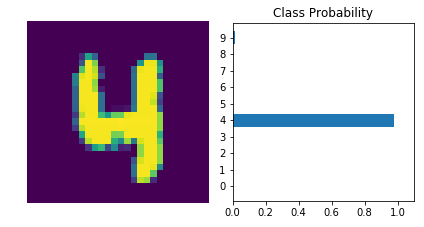

In [0]:
%matplotlib inline

images, labels = next(iter(trainloader))

img = images[0].view(1, 784)
# Turn off gradients to speed up this part
with torch.no_grad():
    logps = model(img)

# Output of the network are log-probabilities, need to take exponential for probabilities
ps = torch.exp(logps)
view_classify(img.view(1, 28, 28), ps)